# Zero-Shot Audio Classification

# Build the Audio Classification pipeline using 🤗 Transformers Library

### 👽 Import Libraries

In [1]:
#!pip install transformers
#!pip install datasets
#!pip install soundfile
#!pip install librosa

In [1]:
#ignore warning

from transformers.utils import logging
logging.set_verbosity_error()

##### 🔊 Ashraq/ESC50 Dataset Overview:
The Ashraq/ESC50 dataset is a collection of 2000 environmental sound recordings, categorized into 50 classes, designed for sound classification tasks. Each audio clip is 5 seconds long and represents various real-world environmental sounds, including animal vocalizations, natural phenomena, and human activities.

In [2]:
#load audio dataset from datasets libraries
from datasets import load_dataset

dataset =  load_dataset("ashraq/esc50",
                     split="train[0:10]" )

print(f"dataset: {dataset}")



/usr/local/lib/python3.9/site-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

dataset: Dataset({
    features: ['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take', 'audio'],
    num_rows: 10
})


In [4]:
audio_sample = dataset[0]
print(f"audio sample details: \n \n {audio_sample}")

audio sample details: 
 
 {'filename': '1-100032-A-0.wav', 'fold': 1, 'target': 0, 'category': 'dog', 'esc10': True, 'src_file': 100032, 'take': 'A', 'audio': {'path': None, 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 44100}}


#### 🔉 🐶 play sample sound

In [5]:
#import libraries
from IPython.display import Audio as IPythonAudio

IPythonAudio(audio_sample["audio"]["array"],
             rate=audio_sample["audio"]["sampling_rate"]
             
)



🤖 Transformers library simplifies natural language processing tasks with its pipeline function, enabling easy implementation of state-of-the-art models in just a few lines of code.

### 👲 Define Model for Audio Classification Transformation

**Pretrained Model: 👇**

- 👉 model-4(clap-htsat-unfused ): https://huggingface.co/laion/clap-htsat-unfused/tree/main
- ./models/laion/clap-htsat-unfused: path directory for specific model

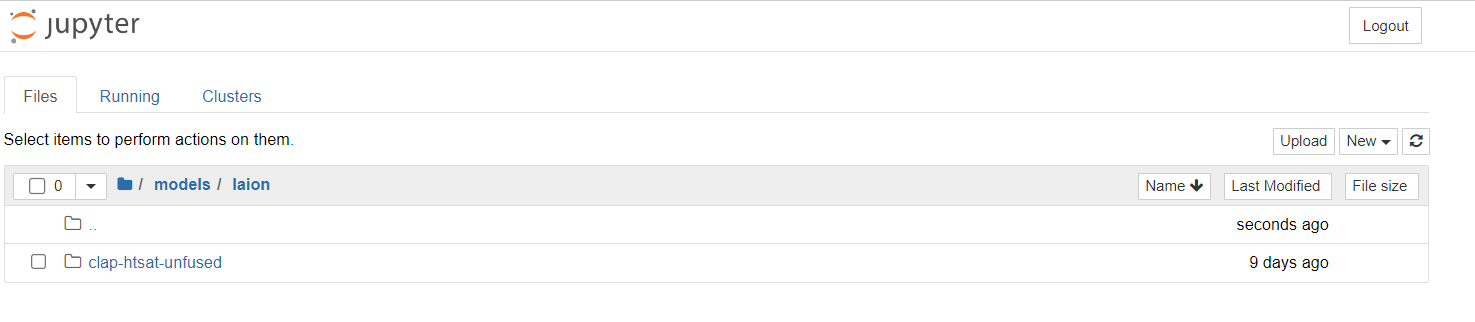

In [6]:
#create pipeline
from transformers import pipeline

In [7]:
zero_shot_classifier = pipeline(task = "zero-shot-audio-classification", model = "./models/laion/clap-htsat-unfused" )
print(f"zero_shot_classifier: {zero_shot_classifier} in memory address")

zero_shot_classifier: <transformers.pipelines.zero_shot_audio_classification.ZeroShotAudioClassificationPipeline object at 0x7ff3f2ead250> in memory address


### Understanding Audio Signal, Sampling, Digital Signal

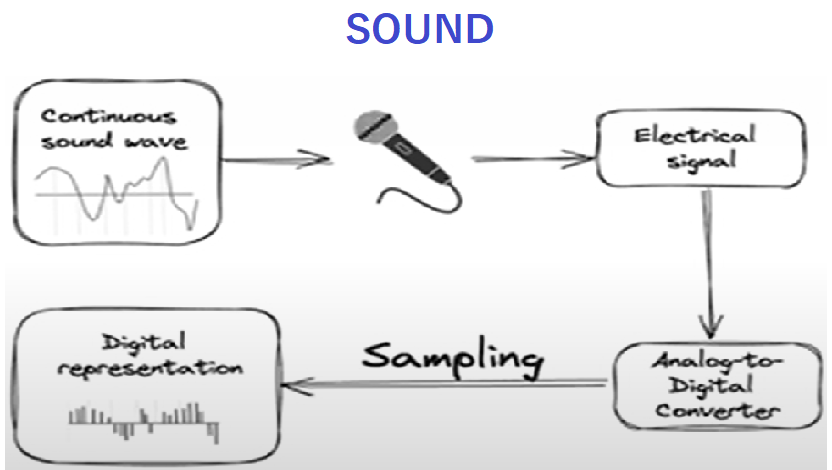


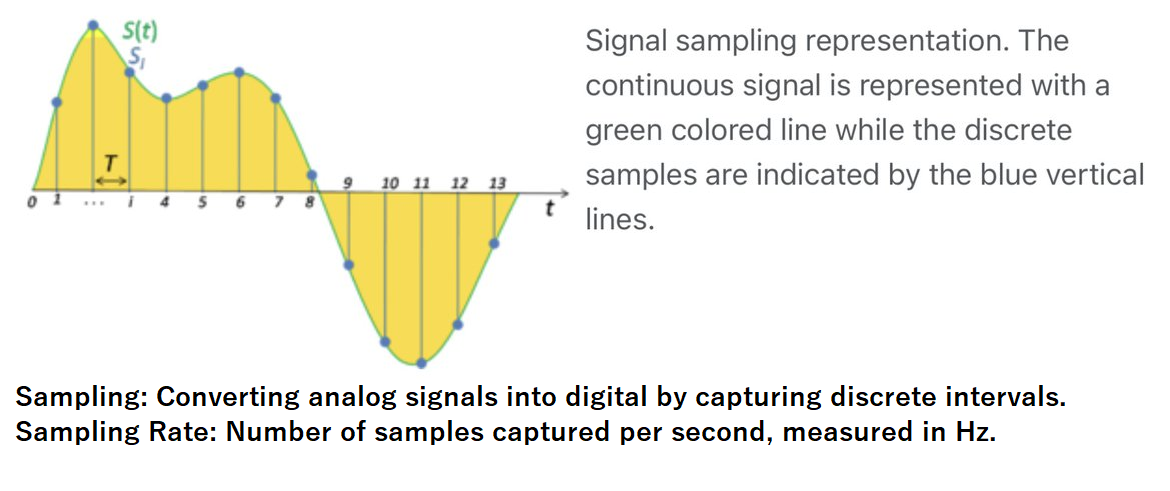

##### 👤 Human Speech Recording: 16,000 Hz
##### 📡 Walkie Talkie/Telephone: 8,000 Hz
##### 🔊 High Resolution Audio: 192,000 Hz

**📌 note:**

For 5 sec of video, **SIGNAL VALUE** is (5 x 8000) = 40,000

In case of transformers, the **SIGNAL VALUE** relies on 🔆 Sequences and 🔆 Attention Mechanism..
**SIGNAL VALUE** will look like 60 secs for 1 secs.

In the case of transformers, particularly in natural language processing tasks, the **SIGNAL VALUE** is determined by the length of the 🔆input sequences and the 🔆 attention mechanism employed. Unlike traditional video processing, where each frame corresponds to a fixed time interval, in transformers, the **SIGNAL VALUE** may appear to be elongated due to the attention mechanism considering sequences of tokens. For example, if the attention mechanism processes 60 tokens per second, the **SIGNAL VALUE** for 1 second of input may appear equivalent to 60 seconds in terms of processing complexity.


In natural language processing, the **input sequence** refers to a series of tokens representing words or characters in a text. The **attention mechanism in transformers** helps the model focus on relevant parts of the input sequence during processing by **assigning weights to each token**, allowing the model to **prioritize important information**. Think of it like giving more attention to key words in a sentence while understanding its context, aiding in tasks like translation and summarization.




### Sampling Rate for Transformer Models¶
- How long does 1 second of high resolution audio (192,000 Hz) appear to the Whisper model (which is trained to expect audio files at 16,000 Hz)?

🎧 Imagine you have a 1-second audio clip recorded at an ultra-high resolution of 192,000 Hz 🕒. Now, let's play it for a model used to hearing audio at a standard rate of 16,000 Hz 🔊. Since the model expects audio at a slower pace, that 1-second clip will feel like it's stretched out over 12 seconds to the model's ears! 🤯

When we divide the high resolution audio sampling rate (192,000 Hz) by the standard model's sampling rate (16,000 Hz), we're essentially calculating how many "chunks" of the standard audio sampling rate fit into the high resolution audio sampling rate within a second.

So, if we divide 192,000 Hz by 16,000 Hz:

**`1sec * 192,000 Hz / 16,000 Hz = 12`**

In [8]:
duration = 1*192000/16000
print(f"recorded time * Ultra Resolution Sound / hearing audio at a standard rate: {duration} sec will look like for 1 sec of audio")

recorded time * Ultra Resolution Sound / hearing audio at a standard rate: 12.0 sec will look like for 1 sec of audio


###### 🔊 How long it will look like for 5 sec of audio?

In [9]:
duration = 5*192000/16000
print(f"recorded time * Ultra Resolution Sound / hearing audio at a standard rate: {duration} sec will look like for 5 sec of audio")

recorded time * Ultra Resolution Sound / hearing audio at a standard rate: 60.0 sec will look like for 5 sec of audio


### check audio hz of model trained at




In [10]:
print(f"sampling rate of model: {zero_shot_classifier.feature_extractor.sampling_rate}")

sampling rate of model: 48000


#### 🤯 sampling rate of sample audio

In [11]:
print("Audio Sample:")
audio_sample

Audio Sample:


{'filename': '1-100032-A-0.wav',
 'fold': 1,
 'target': 0,
 'category': 'dog',
 'esc10': True,
 'src_file': 100032,
 'take': 'A',
 'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 44100}}

In [24]:
data_sampling_rate = audio_sample["audio"]["sampling_rate"]
print(f"sampling rate of data: {data_sampling_rate}")

sampling rate of data: 44100


#### 🔖 change the sampling rate of dataset with model sample rate

In [12]:
#import libraries
from datasets import Audio


In [14]:
dataset = dataset.cast_column("audio",
     Audio(sampling_rate=48_000))

**🎵** This code snippet converts the "audio" column in the dataset to the Audio type, specifying a sampling rate of 48,000 Hz.

In [17]:

audio_sample_replace = dataset[0]


audio_sample_replace

{'filename': '1-100032-A-0.wav',
 'fold': 1,
 'target': 0,
 'category': 'dog',
 'esc10': True,
 'src_file': 100032,
 'take': 'A',
 'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 48000}}

In [19]:
data_sampling_rate_replacing = audio_sample_replace["audio"]["sampling_rate"]
print(f"sampling rate of data after replacing as per model sample rate: {data_sampling_rate_replacing}")

sampling rate of data after replacing as per model sample rate: 48000


### Prediction

In [26]:
candidate_labels = ["Sound of a dog",
                    "Sound of vacuum cleaner", "Sound of airplane", "Sound of cat"]

In [27]:
zero_shot_classifier(audio_sample_replace["audio"]["array"],
                     candidate_labels=candidate_labels)

[{'score': 0.9783717393875122, 'label': 'Sound of a dog'},
 {'score': 0.019367482513189316, 'label': 'Sound of cat'},
 {'score': 0.0014119703555479646, 'label': 'Sound of vacuum cleaner'},
 {'score': 0.000848832365591079, 'label': 'Sound of airplane'}]

**🔊** This output represents the results of a zero-shot classification task applied to an audio sample. Each label corresponds to a potential classification of the sound, and the **score indicates the model's confidence level for each label**. The score represents the likelihood of the audio sample belonging to the respective label, with higher scores indicating higher confidence.

In [28]:
candidate_labels = ["Sound of a child crying",
                    "Sound of vacuum cleaner",
                    "Sound of a bird singing",
                    "Sound of an airplane"]

In [29]:
zero_shot_classifier(audio_sample_replace["audio"]["array"],
                     candidate_labels=candidate_labels)

[{'score': 0.6172538995742798, 'label': 'Sound of a bird singing'},
 {'score': 0.21602486073970795, 'label': 'Sound of vacuum cleaner'},
 {'score': 0.1254722625017166, 'label': 'Sound of an airplane'},
 {'score': 0.041249003261327744, 'label': 'Sound of a child crying'}]